# Assignment 1: Auto Data
In the first assignment you will analyze the auto data by using classic data exploration as well as
treebased methods as reviewed in class.

The dataset contains information on 392 vehicles. You can review details on the dataset on https://
islp.readthedocs.io/en/latest/datasets/Auto.html . The dataset is comprised of the following columns:

| Column       |                                           Description |
|:-------------|------------------------------------------------------:|
| mpg          |                                      miles per gallon |
| cylinders    |                   Number of cylinders between 4 and 8 |
| displacement |                    Engine displacement (cubic inches) |
| horsepower   |                                     Engine horsepower |
| weight       |                                 Vehicle weight (lbs.) |
| acceleration |            Time to accelerate from 0 to 60 mph (sec.) |
| year         |                               Model year (modulo 100) |
| origin       | Origin of car (1. American, 2. European, 3. Japanese) |
| name         |                                          Vehicle name |

The goal of this exercise is to obtain two models:
1. Model 1 tries to predict the variable mpg with respect to the other available variables.
2. Model 2 tries to predict the origin of a car with respect to the other available variables.

### Guide
Load the dataset autoData into your environment as follows:

```python
from ISLP import load_data
autoData = load_data("Auto")
```

Try to answer the following questions with a selection of methods that seems reasonable to you.
The following subsections must be included:

1. Provide an overview over the data with a mixture of plots and statistical indicators. Pay attention
to the scale of each datapoint and create appropriate visualizations that help you understand the
data, in particular the relationship between mpg, origin and other variables. Provide
interpretations and hypotheses for your findings! [5]
2. Provide a treebased model to describe mpg. Think about how to include every predictor variable
properly. Fit at least one Decisiontree and at least one Ensemble method, keeping overfitting in
mind. Take care to describe and investigate your model results carefully. Why and how did you
choose these particular model parameters? Which method provides the best predictions? Which
features are most relevant? Are there outliers which aren’t modelled properly? Provide some
visualizations for your model results! [5]
3. Provide a treebased model to classify origin. As above, think about your predictors and how you
want to include them. Fit at least one Decisiontree and at least one Ensemble method, keeping
overfitting in mind. Describe your results carefully and choose your favourite model as in point 2.
Which features are most relevant? Investigate the model results with appropriate measures and
provide visualizations. [5]

### Methods
Use an appropriate mix of visualizations and statistical key values to discuss your findings. Use
python to fit your models. You are welcome to research different methods and try them in your
work. Ensure that you make a note of which additional libraries need to be installed to run your
code.
If randomized methods are used, ensure to set a randomstate so that the results may be reproduced
accordingly.

### Format
You may work on this exercise in Teams of at most 3. Hand in only one assignment per Team. You
may hand in your assignment in German or English. An appropriate assignment consists of:
* A Juypternotebook that includes the entire sourcecode and describes the work in Markdown
blocks.
* Or one or more .py-Files for the source code and a pdf that provides documentation and
interpretations.
The Code must be executable. You may use AI to assist you in writing your code, but if you do,
you must note down how well the code generation worked for you and reflect on the time and
effort spent to get appropriate results. You must not use AI to write your conclusions and
interpretations beyond reformulation of statements.
Hand in your assignment as a .zip File

In [92]:
import pandas as pd
from ISLP import load_data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

autoData = load_data("Auto")
autoData.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [93]:
autoData.shape

(392, 9)

In [94]:
autoData.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [95]:
autoData.describe().iloc[:,:4]

,mpg,cylinders,displacement,horsepower
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388
std,7.805007,1.705783,104.644004,38.491160
min,9.000000,3.000000,68.000000,46.000000
25%,17.000000,4.000000,105.000000,75.000000
50%,22.750000,4.000000,151.000000,93.500000
75%,29.000000,8.000000,275.750000,126.000000
max,46.600000,8.000000,455.000000,230.000000


In [96]:
autoData.head

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                      

In [97]:
# no missing values so no drop needed
missing_values_count = autoData.isnull().sum()
missing_values_count

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

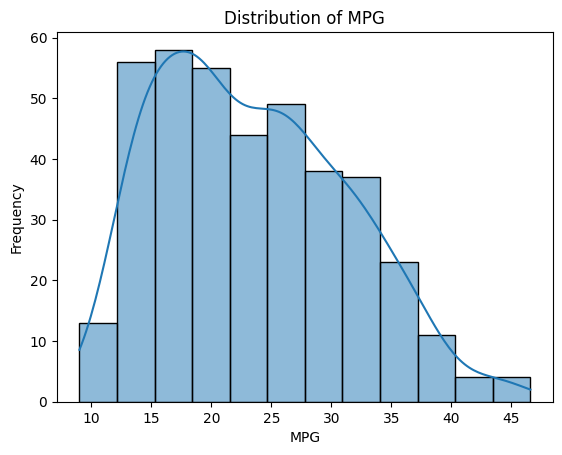

In [98]:
# mpg
sns.histplot(autoData['mpg'], kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

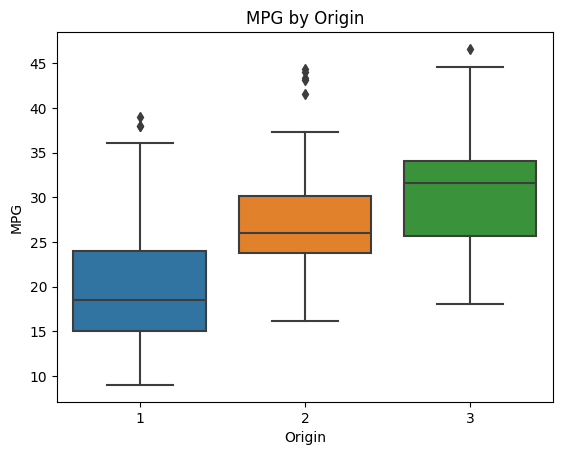

In [99]:
# based on the result of this boxplot american cars have the highest fuel consumption and japanese the lowest
sns.boxplot(x='origin', y='mpg', data=autoData)
plt.title('MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()

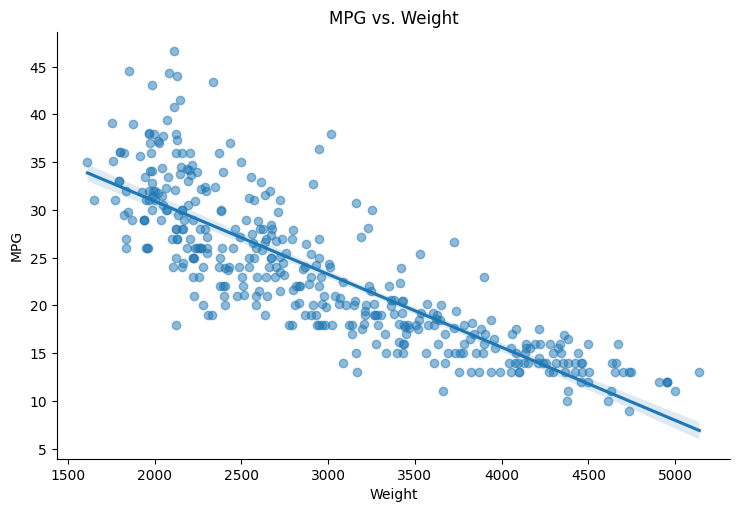

In [100]:
sns.lmplot(x='weight', y='mpg', data=autoData, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('MPG vs. Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

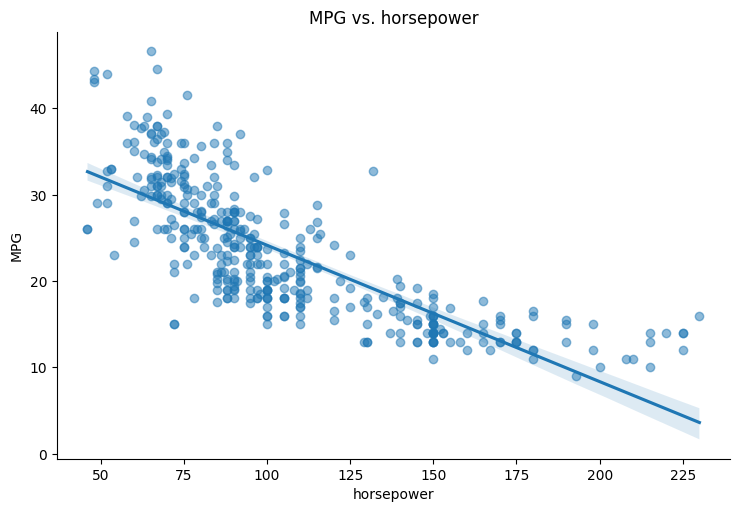

In [101]:
sns.lmplot(x='horsepower', y='mpg', data=autoData, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('MPG vs. horsepower')
plt.xlabel('horsepower')
plt.ylabel('MPG')
plt.show()

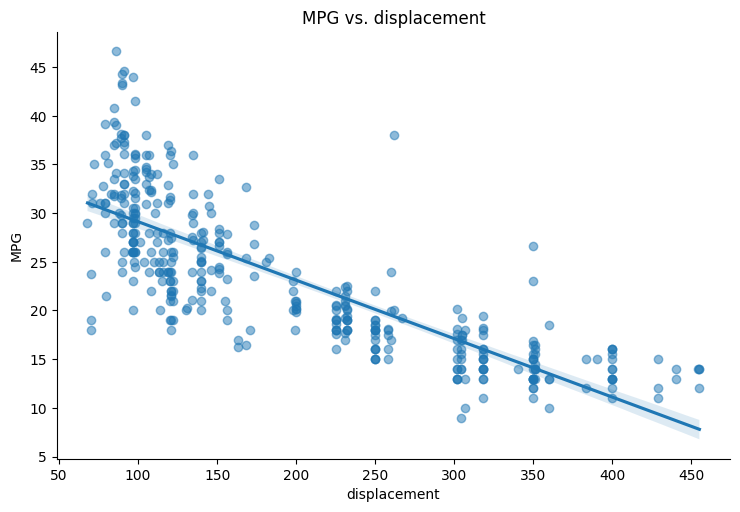

In [102]:
sns.lmplot(x='displacement', y='mpg', data=autoData, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('MPG vs. displacement')
plt.xlabel('displacement')
plt.ylabel('MPG')
plt.show()

In [103]:
corr_mpg_hp = autoData['mpg'].corr(autoData['horsepower'])
corr_mpg_displacement = autoData['mpg'].corr(autoData['displacement'])
corr_mpg_weight = autoData['mpg'].corr(autoData['weight'])
corr_mpg_cylinders = autoData['mpg'].corr(autoData['cylinders'])
corr_mpg_origin = autoData['mpg'].corr(autoData['origin'])


print(f'Corr between mpg and horsepower: {abs(corr_mpg_hp)}')
print(f'Corr between mpg and displacement: {abs(corr_mpg_displacement)}')
print(f'Corr between mpg and weight: {abs(corr_mpg_weight)}')
print(f'Corr between mpg and cylinders: {abs(corr_mpg_cylinders)}')
print(f'Corr between mpg and origin: {abs(corr_mpg_origin)}')

Corr between mpg and horsepower: 0.7784267838977756
Corr between mpg and displacement: 0.8051269467104578
Corr between mpg and weight: 0.8322442148315753
Corr between mpg and cylinders: 0.7776175081260214
Corr between mpg and origin: 0.5652087567164612


In [104]:
y_mpg = autoData['mpg'].values

x_hp = autoData['horsepower'].values.reshape(-1, 1)
model_hp = LinearRegression()
model_hp.fit(x_hp, y_mpg)
r2_hp = model_hp.score(x_hp, y_mpg)

x_displacement = autoData['displacement'].values.reshape(-1, 1)
model_displacement = LinearRegression()
model_displacement.fit(x_displacement, y_mpg)
r2_displacement = model_displacement.score(x_displacement, y_mpg)

x_weight = autoData['weight'].values.reshape(-1, 1)
model_weight = LinearRegression()
model_weight.fit(x_weight, y_mpg)
r2_weight = model_weight.score(x_weight, y_mpg)

x_cylinders = autoData['cylinders'].values.reshape(-1, 1)
model_cylinders = LinearRegression()
model_cylinders.fit(x_cylinders, y_mpg)
r2_cylinders = model_cylinders.score(x_cylinders, y_mpg)

x_origin = autoData['origin'].values.reshape(-1, 1)
model_origin = LinearRegression()
model_origin.fit(x_origin, y_mpg)
r2_origin = model_origin.score(x_origin, y_mpg)


print(f'R2 mpg vs. horsepower: {r2_hp}')
print(f'R2 mpg vs. displacement: {r2_displacement}')
print(f'R2 mpg vs. weight: {r2_weight}')
print(f'R2 mpg vs. cylinders: {r2_cylinders}')
print(f'R2 mpg vs. origin: {r2_origin}')

R2 mpg vs. horsepower: 0.6059482578894348
R2 mpg vs. displacement: 0.6482294003193044
R2 mpg vs. weight: 0.6926304331206254
R2 mpg vs. cylinders: 0.6046889889441245
R2 mpg vs. origin: 0.3194609386689675


Hypotheses after above findings:
- Higher weight results in lower MPG
- Higher displacement results in lower MPG
- Higher horsepower results in lower MPG

# part 2: baaaam

In [105]:
encoded_autoData = pd.get_dummies(autoData, columns=['origin'], drop_first=True)

In [106]:
x = encoded_autoData.drop(columns=['mpg', 'name'])
y = encoded_autoData['mpg']

# split data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# fit tree
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=4, random_state=56, ccp_alpha=0.13646815888229064)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'DecisionTree MSE: {mse_dt}')
print(f'DecisionTree R2: {r2_dt}')


DecisionTree MSE: 9.682664635175612
DecisionTree R2: 0.8102947885671311


In [107]:
print(dt_model.score(x_train,y_train))
print(dt_model.score(x_test,y_test))

0.9008816409611904
0.8102947885671311


In [108]:
# baseline mse to compare with our decision tree mse (has to be significantly smaller to be good)
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(x_train, y_train)
y_pred_dummy = dummy_model.predict(x_test)
baseline_mse = mean_squared_error(y_test, y_pred_dummy)
print(f"Baseline MSE: {baseline_mse}")

Baseline MSE: 51.62029239680701


In [109]:
y_train_pred = dt_model.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
y_test_pred = dt_model.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)

percentage_diff = (test_mse - train_mse) / train_mse * 100
print(f'difference percentage: {percentage_diff}')

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [56],
}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_train_pred_best = best_model.predict(x_train)
train_mse_best = mean_squared_error(y_train, y_train_pred_best)
best_test_mse = mean_squared_error(y_test, best_model.predict(x_test))
percentage_diff_best = (best_test_mse - train_mse_best) / train_mse_best * 100

print(f'best difference percentage: {percentage_diff_best}')
print(f'best_params = {best_params}')
print(f'grid_search_best_estimator = {grid_search.best_estimator_}')
print(f'best_model = {best_model}')

difference percentage: 54.81505426867949
best difference percentage: 51.45722156236416
best_params = {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 56}
grid_search_best_estimator = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=56)
best_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=56)


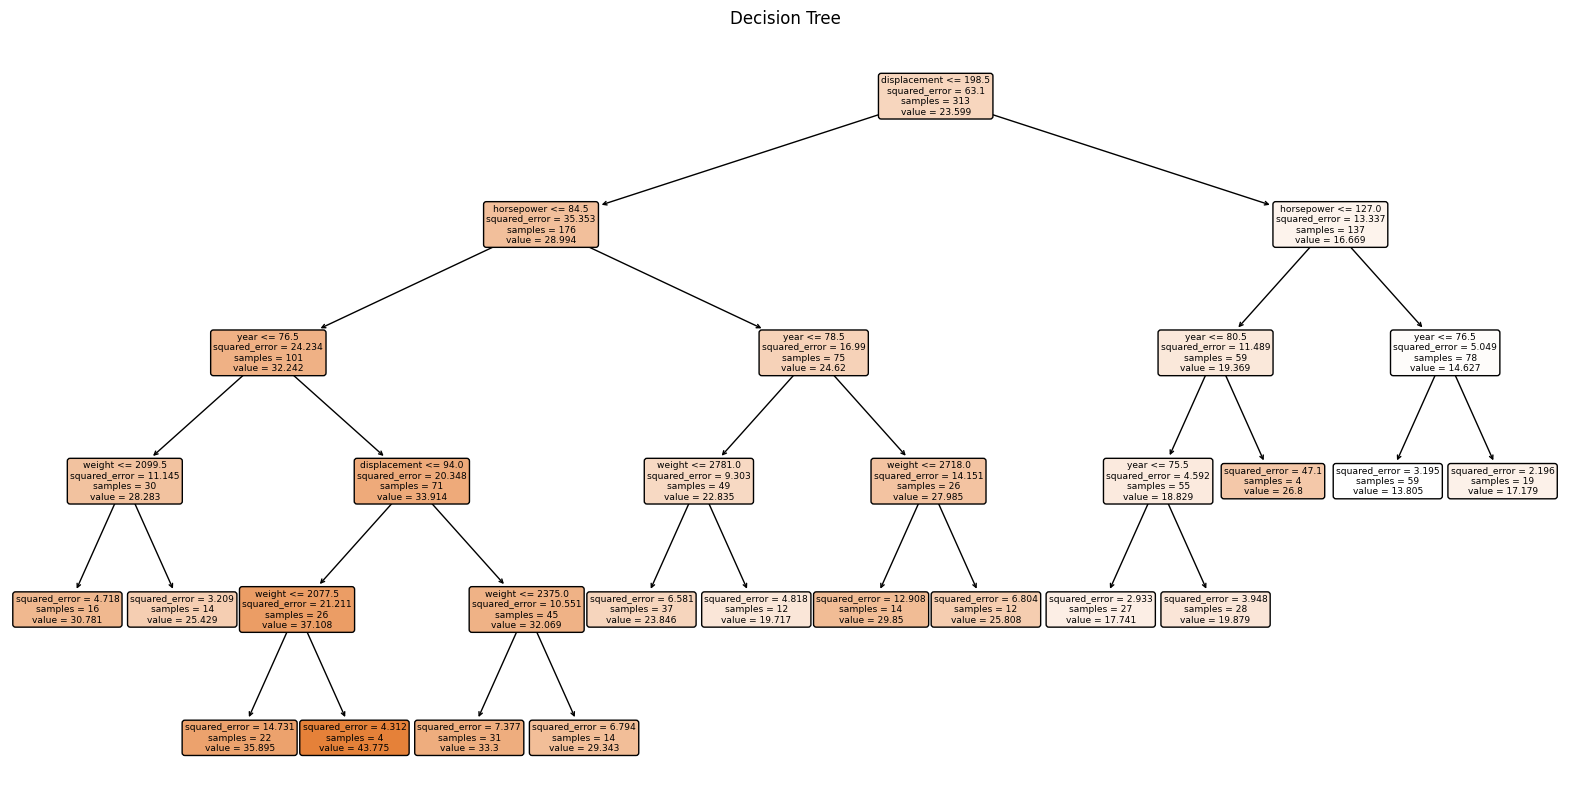

In [110]:
# decision tree visualization
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=x.columns, filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()

In [111]:
# fitting random forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RandomForest MSE: {mse_rf}')
print(f'RandomForest R2: {r2_rf}')

RandomForest MSE: 6.348072244356885
RandomForest R2: 0.8756269650265536


In [112]:
# Models Comparison:
print(f'DecisionTree MSE: {mse_dt}; R2: {r2_dt}')
print(f'RandomForest MSE: {mse_rf}; R2: {r2_rf}')

DecisionTree MSE: 9.682664635175612; R2: 0.8102947885671311
RandomForest MSE: 6.348072244356885; R2: 0.8756269650265536


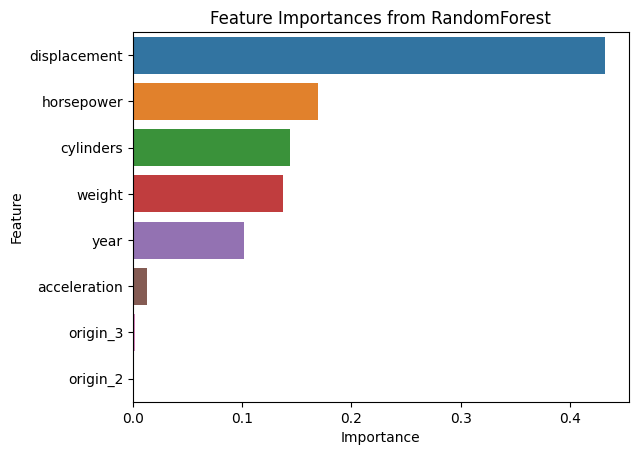

In [113]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from RandomForest')
plt.show()

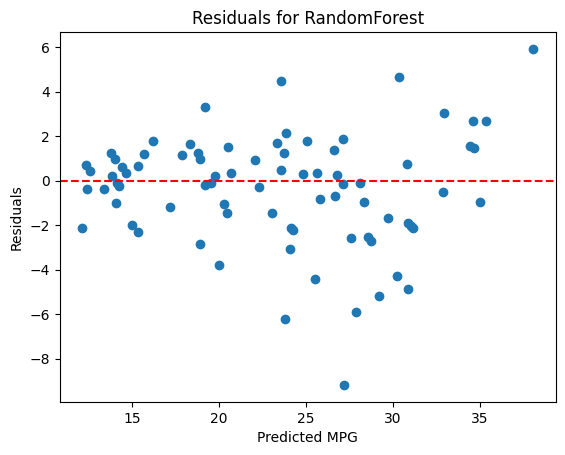

In [114]:
# residuals check:
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for RandomForest')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.show()

# part 3 baam

In [115]:
print(autoData[["origin", "name"]])

     origin                       name
0         1  chevrolet chevelle malibu
1         1          buick skylark 320
2         1         plymouth satellite
3         1              amc rebel sst
4         1                ford torino
..      ...                        ...
387       1            ford mustang gl
388       2                  vw pickup
389       1              dodge rampage
390       1                ford ranger
391       1                 chevy s-10

[392 rows x 2 columns]


In [116]:
from sklearn.tree import DecisionTreeClassifier

x = autoData.drop(columns=['origin', 'name'])
y = autoData['origin']

# training test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [117]:
origin_classifier = DecisionTreeClassifier()
origin_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

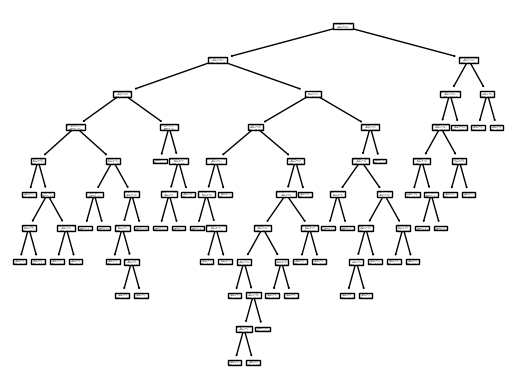

In [118]:
fig, ax = plt.subplots()
plot_tree(origin_classifier, feature_names=x_train.columns, ax=ax)
plt.show()

In [119]:
from sklearn.metrics import classification_report, confusion_matrix

y_train_pred = origin_classifier.predict(x_train)
y_test_pred = origin_classifier.predict(x_test)

print(classification_report(y_true=y_train, y_pred=y_train_pred))
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       202
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        63

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313

              precision    recall  f1-score   support

           1       0.87      0.93      0.90        43
           2       0.76      0.65      0.70        20
           3       0.56      0.56      0.56        16

    accuracy                           0.78        79
   macro avg       0.73      0.71      0.72        79
weighted avg       0.78      0.78      0.78        79



Text(0.5, 1.0, 'Confusion Matrix for Testset')

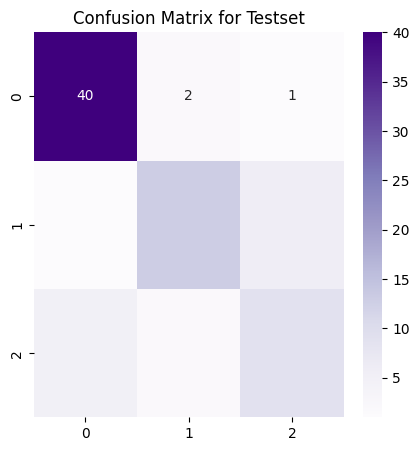

In [120]:
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_test_pred), annot=True, cmap="Purples", ax=ax)
ax.set_title("Confusion Matrix for Testset")

In [121]:
print(f"Trainingscore: \t{origin_classifier.score(x_train, y_train)}")
print(f"Testscore: \t{origin_classifier.score(x_test, y_test)}")

Trainingscore: 	1.0
Testscore: 	0.7848101265822784


As you can see: The first Decision Tree without any parameters gives us a slight overfit but prediciting the origin might be quite easy with just a bit trimming. 

### Gridsearch

In [122]:
param_grid = {
    'max_depth': range(2, 20),
    'min_samples_split': range(2,15),
    'min_samples_leaf': range(1,15),
    'random_state': [56],
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [123]:
print(best_model)
print(best_params)

DecisionTreeClassifier(max_depth=9, random_state=56)
{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 56}


In [124]:
origin_classifier = best_model
origin_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=56)

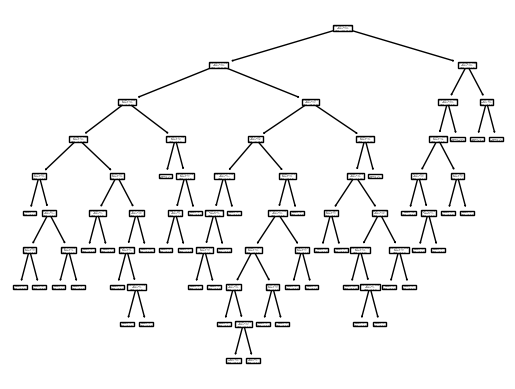

In [125]:
fig, ax = plt.subplots()
plot_tree(origin_classifier, feature_names=x_train.columns, ax=ax)
plt.show()

In [126]:
y_train_pred = origin_classifier.predict(x_train)
y_test_pred = origin_classifier.predict(x_test)

print(f"Training-Scrore: \n{classification_report(y_true=y_train, y_pred=y_train_pred)}")
print(f"Test-Score: \n{classification_report(y_true=y_test, y_pred=y_test_pred)}")

Training-Scrore: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       202
           2       1.00      1.00      1.00        48
           3       1.00      0.98      0.99        63

    accuracy                           1.00       313
   macro avg       1.00      0.99      1.00       313
weighted avg       1.00      1.00      1.00       313

Test-Score: 
              precision    recall  f1-score   support

           1       0.91      0.93      0.92        43
           2       0.78      0.70      0.74        20
           3       0.65      0.69      0.67        16

    accuracy                           0.82        79
   macro avg       0.78      0.77      0.77        79
weighted avg       0.82      0.82      0.82        79



In [43]:
print(pd.DataFrame({"Columns": autoData.drop(columns=[ "origin", "name"]).columns,
 "Importances": origin_classifier.feature_importances_}))

        Columns  Importances
0           mpg     0.137214
1     cylinders     0.010609
2  displacement     0.511797
3    horsepower     0.179766
4        weight     0.048181
5  acceleration     0.091309
6          year     0.021125
